<a href="https://colab.research.google.com/github/last-war/HW_DataScience/blob/Homework-12/HW_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зробіть summary нижчевказаного тексту використовуючи бібліотеки для NLP: nltk та SpaCy



In [2]:
TEXT = 'The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound.'

Виконання по підказці нижче

https://dou.ua/lenta/articles/first-steps-in-nlp-nltk/

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Токанайзер

In [5]:
def my_tokenizer(text, stop_words=[]):
    """ Tokenizer returns only alphabetic tokens.

    Keyword arguments:
    text -- text for tokenize
    stop_words -- list of stop words (default [])
    """
    tokenized_list=[]
    text=re.sub(r"""['’"`�]""", '', text)
    text=re.sub(r"""([0-9])([\u0400-\u04FF]|[A-z])""", r"\1 \2", text)
    text=re.sub(r"""([\u0400-\u04FF]|[A-z])([0-9])""", r"\1 \2", text)
    text=re.sub(r"""[\-.,:+*/_]""", ' ', text)

    for word in nltk.word_tokenize(text):
        if word.isalpha():
            word=word.lower()
        if word not in stop_words:
            tokenized_list.append(word)
    return tokenized_list

In [8]:
my_tok_list = my_tokenizer(TEXT)
print(len(my_tok_list))
my_tok_list = my_tokenizer(TEXT, set(stopwords.words('english')))
print(len(my_tok_list))

483
307


Кількість токенів:  298
Кількість унікальних токенів:  298
Найбільш уживані токени:  [(('orbiter', 'discovery', 'ov', '103', 'considered', 'eligible', 'listing', 'national', 'register', 'historic'), 1), (('discovery', 'ov', '103', 'considered', 'eligible', 'listing', 'national', 'register', 'historic', 'places'), 1), (('ov', '103', 'considered', 'eligible', 'listing', 'national', 'register', 'historic', 'places', '('), 1), (('103', 'considered', 'eligible', 'listing', 'national', 'register', 'historic', 'places', '(', 'nrhp'), 1), (('considered', 'eligible', 'listing', 'national', 'register', 'historic', 'places', '(', 'nrhp', ')'), 1), (('eligible', 'listing', 'national', 'register', 'historic', 'places', '(', 'nrhp', ')', 'context'), 1), (('listing', 'national', 'register', 'historic', 'places', '(', 'nrhp', ')', 'context', 'u'), 1), (('national', 'register', 'historic', 'places', '(', 'nrhp', ')', 'context', 'u', 'space'), 1), (('register', 'historic', 'places', '(', 'nrhp', ')', 'c

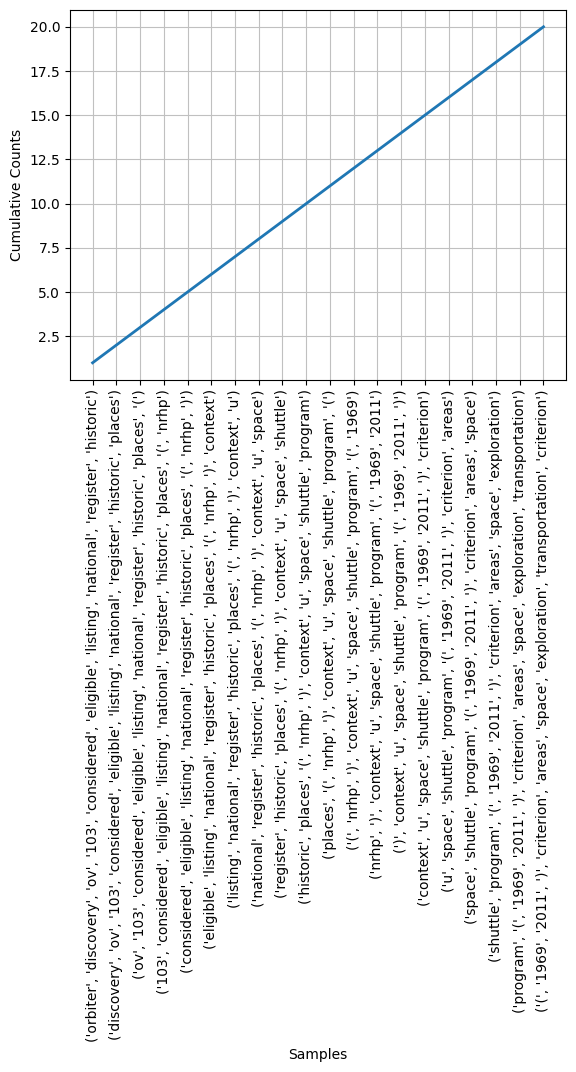

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [15]:

my_tok_list = my_tokenizer(TEXT, set(stopwords.words('english')))
words=nltk.ngrams(my_tok_list,n=10)
words=nltk.FreqDist(words)
print ('Кількість токенів: ',words.N())
print ('Кількість унікальних токенів: ', words.B())
print ('Найбільш уживані токени: ', words.most_common(20))
words.plot (20, cumulative = True)



Підготовка

In [10]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from heapq import nlargest

nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Підготовка тексту
Перш ніж почати створювати text summary, текст потрібно підготувати. Це включає в себе видалення непотрібних символів, токенізацію (розбиття тексту на окремі слова або речення), видалення стоп-слів (слова, які не несуть суттєвої інформації) і, за необхідності, інші обробки тексту, такі як стемінг або лематизація.


```
# Текст для обробки
text = "This is an example sentence for tokenization and lemmatization."
```




```
# Токенізація
doc = nlp(text)
tokens = [token.text for token in doc]
print(tokens)
```



NLTK також надає розширені функції для обробки тексту. За допомогою методів NLTK, таких як word_tokenize, sent_tokenize або stopwords, ми можемо отримати токенизовані слова та речення, а також список стоп-слів.


```

tokens = word_tokenize(text)
sentences = sent_tokenize(text)
stop_words = set(stopwords.words('english'))

```


І також не забуваємо про знаки пунктуації

```
punctuation = punctuation + '\n'
```
Також можна порахувати частоту появи тих чи інших слів у тексті(але варто пам'ятати, що це треба робити, вже виключивши усі знаки пунктуації)
```
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1
```
Коли ми вже маємо підготовлений текст та використали SpaCy або NLTK для отримання необхідної інформації, ми можемо створити текстове резюме. Це можна зробити, наприклад, шляхом виділення найважливіших речень з тексту, враховуючи їх вагу або частоту вживання певних слів.

In [13]:
punctuation = '-.,(’)“”[]{}*&^%$#@!":;\n'


doc = nlp(TEXT)
tokens = [token.text for token in doc]

#tokens = nltk.word_tokenize(TEXT)

sentences = sent_tokenize(TEXT)
stop_words = set(stopwords.words('english'))
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stop_words:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1


In [11]:
select_length = int(len(word_frequencies))
summary = nlargest(select_length, word_frequencies, key = word_frequencies.get)
summary

['Space',
 'first',
 'Discovery',
 'Shuttle',
 'orbiter',
 'Criterion',
 'missions',
 'space',
 'five',
 'flew',
 'also',
 'fly',
 'reusable',
 'U.S.',
 'Program',
 'C',
 'significant',
 'vehicles',
 'SSP',
 'orbiters',
 'construction',
 'station',
 'thirty',
 'times',
 'twenty',
 'Challenger',
 'shuttle',
 'two',
 'ISS',
 'flown',
 'engineering',
 'Hale',
 'winged',
 'hypersonic',
 'cargo',
 'carrying',
 'base',
 'aircraft',
 'materials',
 'featured',
 'System',
 'TPS',
 'Orbiter',
 'OV-103',
 'considered',
 'eligible',
 'listing',
 'National',
 'Register',
 'Historic',
 'Places',
 'NRHP',
 'context',
 '1969',
 '2011',
 'areas',
 'Exploration',
 'Transportation',
 'area',
 'Engineering',
 'achieved',
 'significance',
 'within',
 'past',
 'fifty',
 'years',
 'Criteria',
 'Consideration',
 'G',
 'applies',
 'oldest',
 'three',
 'extant',
 'constructed',
 'longest',
 'running',
 'American',
 'program',
 'date',
 'third',
 'built',
 'NASA',
 'Unlike',
 'Mercury',
 'Gemini',
 'Apollo',
 'p

#Бібліотека heapq
Бібліотека heapq є частиною стандартної бібліотеки Python і надає функціонал для роботи зі структурами даних під назвою heap. Один з імпортованих об’єктів у цій бібліотеці - nlargest - є функцією, яка дозволяє знаходити найбільші елементи з ітерабельного об’єкту.
```
from heapq import nlargest
```
Функція `nlargest(n, iterable, key=None)`` приймає три аргументи:

n - це кількість найбільших елементів, які ви хочете отримати
iterable - це ітерабельний об’єкт, з якого ви хочете вибрати найбільші елементи
key (необов’язковий) - це функція, яка визначає, за яким ключем відбувається порівняння елементів (наприклад, key=str.lower)
Функція nlargest повертає список з n найбільших елементів з iterable. Ці елементи будуть впорядковані у порядку спадання. Якщо n більше довжини iterable, то функція поверне весь iterable у відсортованому порядку.

Отже, імпортований from heapq import nlargest дозволяє використовувати функцію `nlargest`` для знаходження найбільших елементів з довільного ітерабельного об’єкту.
```
select_length = int(len(sentence_tokens))
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
summary
```
У даному випадку, функція nlargest використовується для знаходження в select_length найбільших елементів зі словника sentence_scores. Ключі словника представляють речення, а значення - їхні оцінки або ваги. Аргумент key заданий як sentence_scores.get, що означає, що функція get використовується для порівняння елементів. У даному випадку, вона повертає значення (оцінку) для кожного речення, яке використовується як критерій для порівняння. Отже, змінна summary міститиме список select_length найкращих речень зі словника sentence_scores у порядку спадання оцінок.